<a href="https://colab.research.google.com/github/Melisacid/Act_6.2/blob/main/Actividad_6_2_mexico_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("data_clean_df_mexico.csv")
df.head()

<ipython-input-2-1aaf7ce4658c>:1: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data_clean_df_mexico.csv")


,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,0.0,2056638,20230329041210,10531228,3.0,7.0,19.35353,-99.16299,3.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,1.0,2072354,20230329041210,16840050,3.0,3.0,19.35358,-99.16948,2.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,2.0,696037,20230329041210,3531879,4.0,4.0,19.4418,-99.18402,6.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.0,35797,20230329041210,153786,1.0,1.0,19.38283,-99.2,2.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",3658.0,t,2023-03-29,2012-10-31,2022-12-21,f
4,4.0,44616,20230329041210,196253,16.0,16.0,19.41162,-99.17794,3.1,1.5,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f


In [3]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

144

In [4]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [5]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24226 entries, 0 to 24225
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    24226 non-null  float64
 1   id                                            24226 non-null  object 
 2   scrape_id                                     24226 non-null  object 
 3   host_id                                       24226 non-null  int64  
 4   host_listings_count                           24226 non-null  object 
 5   host_total_listings_count                     24226 non-null  object 
 6   latitude                                      24226 non-null  object 
 7   longitude                                     24226 non-null  object 
 8   accommodates                                  24226 non-null  object 
 9   bedrooms                                      24226 non-null 

## Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”

# **Tipo de habitación 1: Private room.**

## **1.“host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”**

In [ ]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')  
private_room[['host_acceptance_rate',"host_response_rate"]] = private_room[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

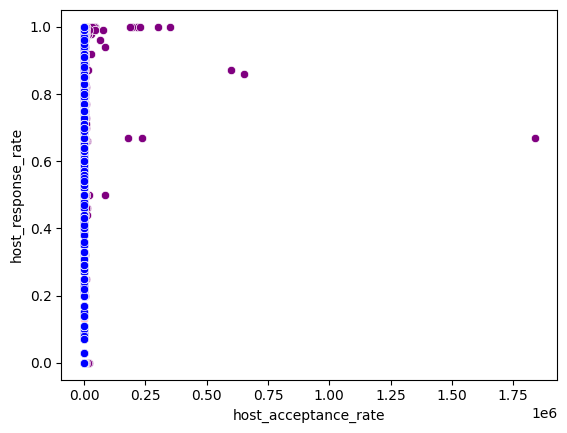

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= private_room['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 3.59357375e-01,  8.17127046e-10,  7.55080097e-04, -2.70223064e-02]),
 'rank_': 4,
 'singular_': array([2.16083020e+06, 3.22471070e+03, 2.29163461e+01, 2.10968008e+01]),
 'intercept_': 0.6592176970536278}

**Modelo matemático: y= 1.97911016e-01x1 + -2.52257605e-08x2 + 1.78771577e-04x3 + -1.48484267e-02x4 + 90.14555660858437**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.13076800443228753

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.93244118, 0.85805937, 0.54409526, ..., 0.89157072, 0.89157044,
       0.89157067])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,0.932441,7.0,61792,20230329041210,299558,2.0,3.0,19.41083,-99.18057,2.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,0.858059,16.0,760912,20230329041210,3817743,1.0,1.0,19.40891,-99.16083,2.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,0.544095,17.0,2088218,20230329041210,10659485,1.0,2.0,19.34022,-99.15306,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,0.532215,18.0,2093036,20230329041210,3083561,1.0,2.0,19.44178,-99.20202,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,0.891571,21.0,131610,20230329041210,647454,3.0,4.0,19.35416,-99.16488,2.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

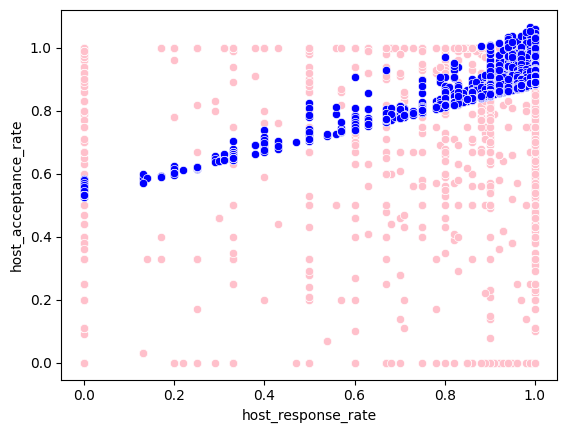

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

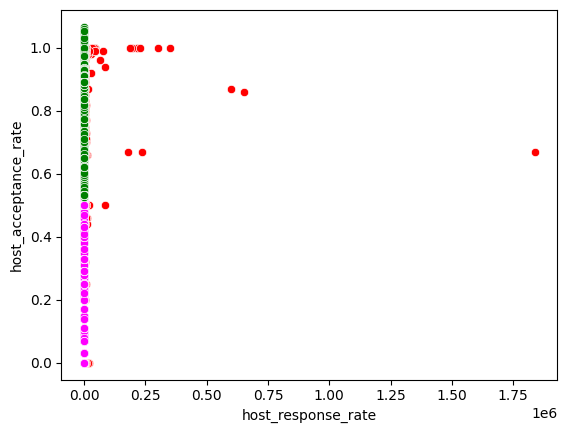

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.13076800443228753
Coeficiente de correlación:  0.36161858972166727


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

In [ ]:
private_room = private_room.astype({"availability_365": float, "number_of_reviews": float, "host_response_rate": float, "accommodates": float}).astype({"availability_365": int, "number_of_reviews": int, "host_response_rate": int, "accommodates": int})


<Axes: xlabel='availability_365', ylabel='price'>

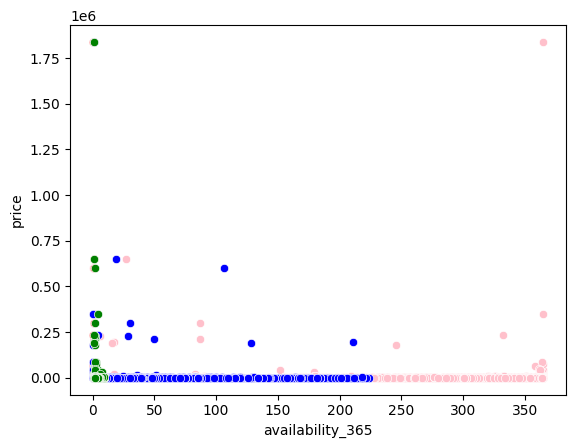

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="green", data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= private_room['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([  -1.33015351, -346.36992876,    1.69330256,   98.14834181]),
 'rank_': 4,
 'singular_': array([11334.83607743,  3217.95572884,    89.69432264,    41.49938605]),
 'intercept_': 1859.9269101452664}

**Modelo matemático: y= -1.44748703x1 + 568.22965627x2+ -13.41899636x3 + 32.5337422x4 + 1456.3609884316134**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0001137889106036516

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([1591.37263318, 1581.84438111, 1588.77816687, ..., 1250.95070281,
       1225.67778605, 1470.42603255])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Prediccionesa2', y_pred)
private_room.head()

,Prediccionesa2,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,1591.372633,0.916245,1614.515871,0.932441,7.0,61792,20230329041210,299558,2.0,3.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,1581.844381,0.853220,1339.423236,0.858059,16.0,760912,20230329041210,3817743,1.0,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,1588.778167,0.854222,2638.677639,0.544095,17.0,2088218,20230329041210,10659485,1.0,2.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,1570.717561,0.851476,2641.615679,0.532215,18.0,2093036,20230329041210,3083561,1.0,2.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,1592.800156,0.851476,1536.528367,0.891571,21.0,131610,20230329041210,647454,3.0,4.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='availability_365', ylabel='price'>

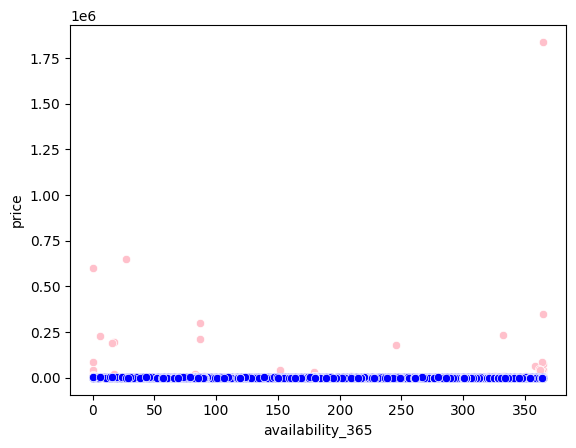

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='availability_365', y='Prediccionesa2', color="blue", data=private_room)

<Axes: xlabel='availability_365', ylabel='price'>

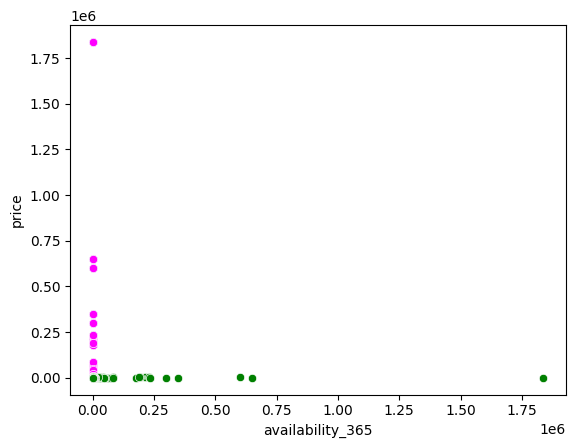

In [ ]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=private_room)
sns.scatterplot(x='price', y='Prediccionesa2', color="green", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0001137889106036516
Coeficiente de correlación:  0.010667188505114718


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

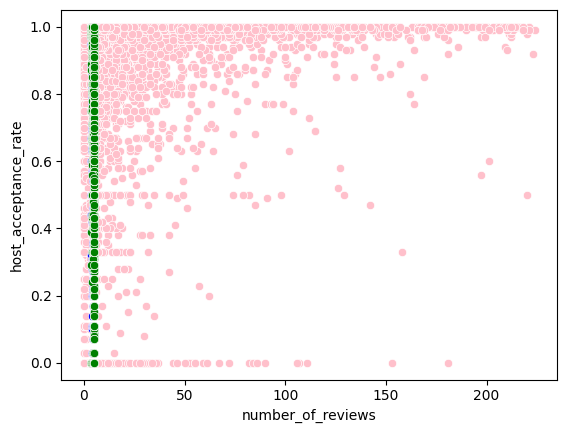

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=private_room)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= private_room['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00107417,  0.02629903, -0.04755787]),
 'rank_': 3,
 'singular_': array([3224.46965428,   25.09312865,   14.53517614]),
 'intercept_': 0.9561763112665994}

**Modelo matemático: y= 0.0002161x1 + -0.00433818x2 + -0.00180715x3 + 0.9933496363257538**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.023658075882616925

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.91622868, 0.85323687, 0.85424491, ..., 0.85150396, 0.85150396,
       0.85150396])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Prediccionesn3', y_pred)
private_room.head()

,Prediccionesn3,Prediccionesa2,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
7,0.916229,1591.372633,0.916245,1614.515871,0.932441,7.0,61792,20230329041210,299558,2.0,...,Private room in home,Private room,1 shared bath,"[""Heating - split type ductless system"", ""Whir...",1089.0,t,2023-03-30,2017-11-01,2022-12-31,f
16,0.853237,1581.844381,0.853220,1339.423236,0.858059,16.0,760912,20230329041210,3817743,1.0,...,Private room in rental unit,Private room,1.5 baths,"[""Wifi"", ""Washer"", ""Kitchen"", ""TV with standar...",726.0,t,2023-03-30,2012-12-18,2016-01-30,f
17,0.854245,1588.778167,0.854222,2638.677639,0.544095,17.0,2088218,20230329041210,10659485,1.0,...,Private room in home,Private room,1.5 baths,"[""Wifi"", ""Iron"", ""Washer"", ""Pets allowed"", ""Ha...",375.0,t,2023-03-30,2014-01-07,2018-05-15,f
18,0.851504,1570.717561,0.851476,2641.615679,0.532215,18.0,2093036,20230329041210,3083561,1.0,...,Private room in rental unit,Private room,1 bath,"[""Elevator"", ""Heating"", ""Wifi"", ""Washer"", ""Pet...",2835.0,t,2023-03-29,2014-01-07,2018-05-15,f
21,0.851504,1592.800156,0.851476,1536.528367,0.891571,21.0,131610,20230329041210,647454,3.0,...,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,2014-09-06,2023-01-29,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

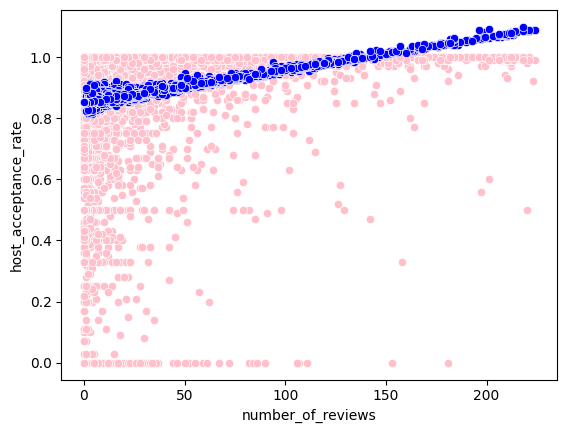

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='number_of_reviews', y='Prediccionesn3', color="blue", data=private_room)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

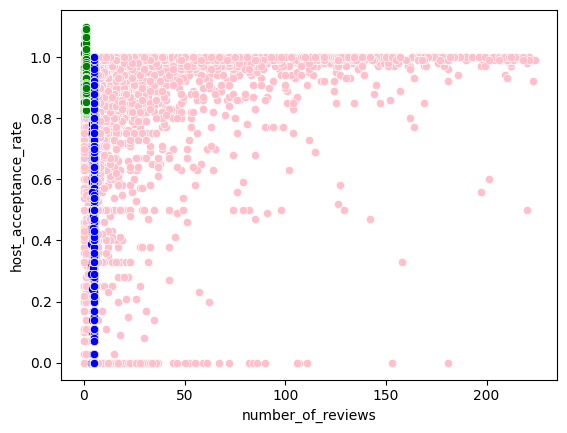

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Prediccionesn3', color="green", data=private_room)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.023658075882616925
Coeficiente de correlación:  0.15381181971037508


# **Tipo de habitación 2: Entire home/apt.**

In [6]:
df= pd.read_csv("data_clean_df_mexico.csv")
df.head()

<ipython-input-6-1aaf7ce4658c>:1: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("data_clean_df_mexico.csv")


,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,0.0,2056638,20230329041210,10531228,3.0,7.0,19.35353,-99.16299,3.0,1.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,1.0,2072354,20230329041210,16840050,3.0,3.0,19.35358,-99.16948,2.0,1.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,2.0,696037,20230329041210,3531879,4.0,4.0,19.4418,-99.18402,6.0,3.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,3.0,35797,20230329041210,153786,1.0,1.0,19.38283,-99.2,2.0,1.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",3658.0,t,2023-03-29,2012-10-31,2022-12-21,f
4,4.0,44616,20230329041210,196253,16.0,16.0,19.41162,-99.17794,3.1,1.5,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f


In [7]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

144

In [8]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [9]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **1.host_acceptance_rate vs host_response_rate**

In [11]:
enthome_apt = df[df['room_type'] == 'Entire home/apt']

In [ ]:
#Cambiar datos
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].astype(str)  
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].str.replace('%', '')  
enthome_apt['host_response_rate'] = pd.to_numeric(enthome_apt['host_response_rate'], errors='coerce')
enthome_apt[['host_acceptance_rate',"host_response_rate"]] = enthome_apt[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

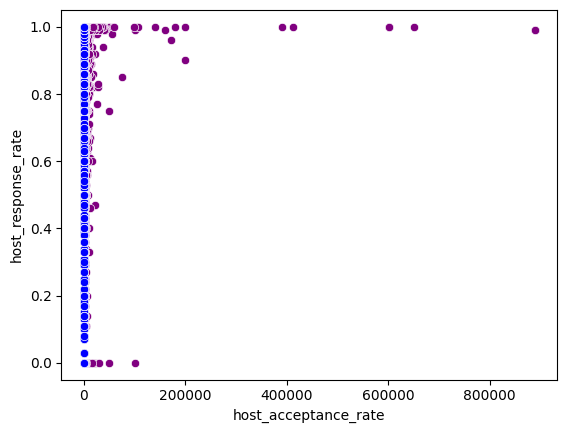

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=enthome_apt)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= enthome_apt['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 4.20196258e-01,  1.38911107e-07,  3.94998024e-04, -1.81414189e-03]),
 'rank_': 4,
 'singular_': array([1.82845720e+06, 5.57057970e+03, 2.79237921e+01, 1.77692394e+01]),
 'intercept_': 0.5245365583751296}

**Modelo matemático: y= 4.17197584e-01x1 + -1.00834090e-08x2 + 1.23100925e-04x3 + -4.88579925e-03x4 + 0.5839431273540848**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.13046095468413133

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.94424697, 0.9601444 , 0.95205117, ..., 0.93641749, 0.93637304,
       0.93644528])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones', y_pred)
enthome_apt.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,0.944247,0.0,2056638,20230329041210,10531228,3.0,7.0,19.35353,-99.16299,3.0,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,0.960144,1.0,2072354,20230329041210,16840050,3.0,3.0,19.35358,-99.16948,2.0,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,0.952051,2.0,696037,20230329041210,3531879,4.0,4.0,19.4418,-99.18402,6.0,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,0.936714,3.0,35797,20230329041210,153786,1.0,1.0,19.38283,-99.2,2.0,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",3658.0,t,2023-03-29,2012-10-31,2022-12-21,f
4,0.964204,4.0,44616,20230329041210,196253,16.0,16.0,19.41162,-99.17794,3.1,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

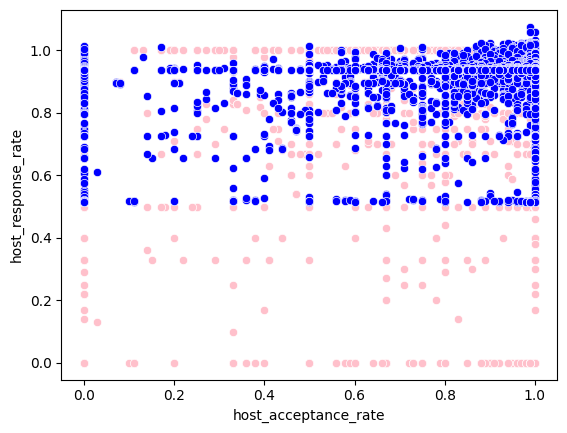

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

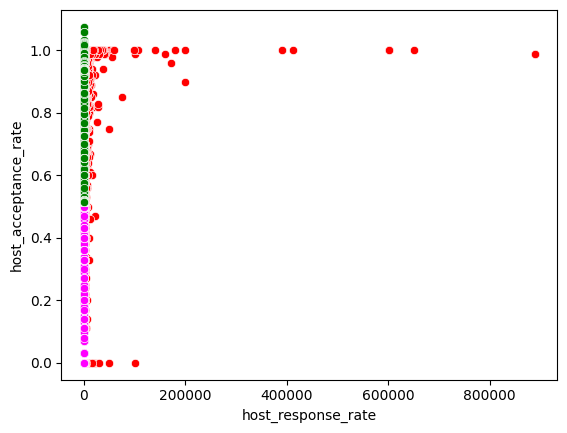

In [ ]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.13046095468413133
Coeficiente de correlación:  0.3611937910376247


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

In [ ]:
print(enthome_apt['availability_365'].dtype)
print(enthome_apt['price'].dtype)
enthome_apt['availability_365'] = enthome_apt['availability_365'].apply(str)
enthome_apt['availability_365'] = enthome_apt['availability_365'].fillna('')
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].apply(str)
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].fillna('')
enthome_apt['number_of_reviews'] = enthome_apt['number_of_reviews'].apply(str)
enthome_apt['number_of_reviews'] = enthome_apt['number_of_reviews'].fillna('')
enthome_apt['accommodates'] = enthome_apt['accommodates'].apply(str)
enthome_apt['accommodates'] = enthome_apt['accommodates'].fillna('')

<Axes: xlabel='availability_365', ylabel='price'>

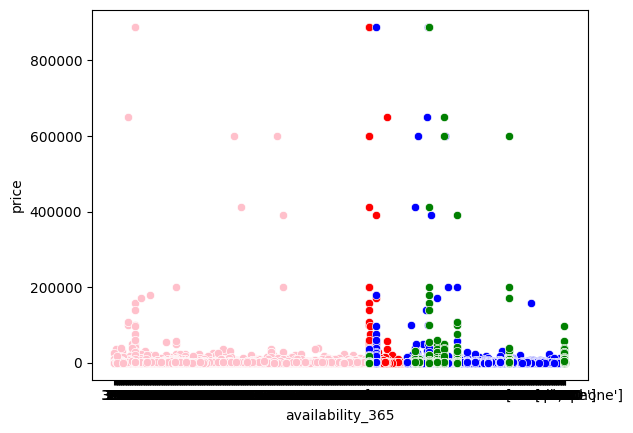

In [14]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="green", data=enthome_apt)

In [17]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [19]:
enthome_apt = enthome_apt.apply(pd.to_numeric, errors='coerce')
enthome_apt.fillna(0, inplace=True)
Vars_Indep = enthome_apt[['availability_365', 'host_response_rate', 'number_of_reviews', "accommodates"]]
Var_Dep = enthome_apt['price']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [20]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [21]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 3.93664665e-01, -2.17346343e+03, -3.43629634e+00,  2.30137948e+02]),
 'rank_': 4,
 'singular_': array([15395.21734668,  5558.58871305,   199.23453863,    17.80101337]),
 'intercept_': 3397.9917254587167}

**Modelo matemático: y= 5.91040103e-01x1 + -1.00963732e+04x2+ 6.63729846e-01x3 + 2.15436449e+02x4 + 11194.520163669176**

In [22]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0012135908016477348

In [23]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([1970.32727116, 1611.39809261, 2505.58925481, ..., 2979.18153651,
       1820.22483975, 2746.68160076])

In [24]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones2', y_pred)
enthome_apt.head()

,Predicciones2,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,1970.327271,0.0,2056638.0,2.023033e+13,10531228,3.0,7.0,19.35353,-99.16299,3.0,...,0.0,0.0,0.0,0.0,1434.0,0.0,0.0,0.0,0.0,0.0
1,1611.398093,1.0,2072354.0,2.023033e+13,16840050,3.0,3.0,19.35358,-99.16948,2.0,...,0.0,0.0,0.0,0.0,830.0,0.0,0.0,0.0,0.0,0.0
2,2505.589255,2.0,696037.0,2.023033e+13,3531879,4.0,4.0,19.44180,-99.18402,6.0,...,0.0,0.0,0.0,0.0,1469.0,0.0,0.0,0.0,0.0,0.0
3,1827.704468,3.0,35797.0,2.023033e+13,153786,1.0,1.0,19.38283,-99.20000,2.0,...,0.0,0.0,0.0,0.0,3658.0,0.0,0.0,0.0,0.0,0.0
4,1858.571257,4.0,44616.0,2.023033e+13,196253,16.0,16.0,19.41162,-99.17794,3.1,...,0.0,0.0,0.0,0.0,18000.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='availability_365', ylabel='price'>

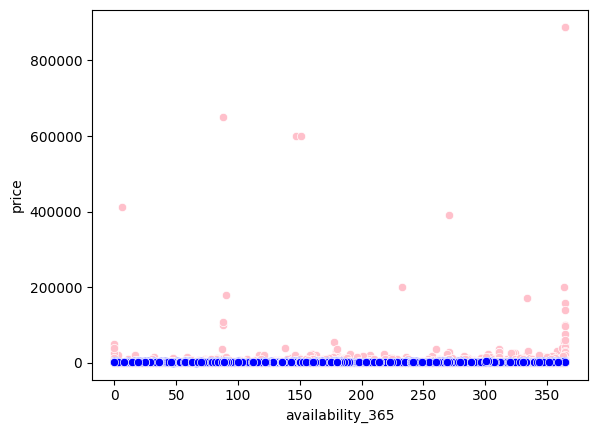

In [26]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='availability_365', y='Predicciones2', color="blue", data=enthome_apt)

<Axes: xlabel='availability_365', ylabel='price'>

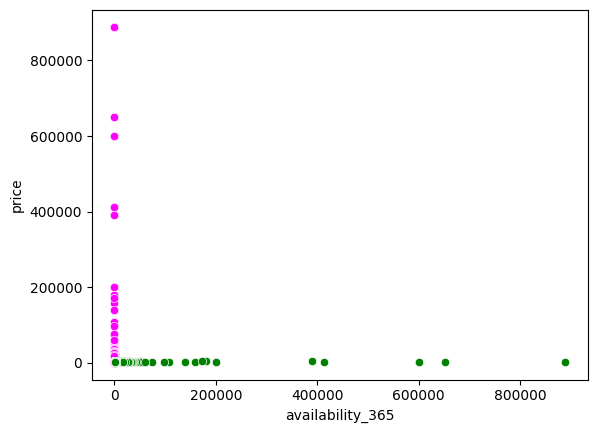

In [27]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=enthome_apt)
sns.scatterplot(x='price', y='Predicciones2', color="green", data=enthome_apt)

In [28]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.0012135908016477348
Coeficiente de correlación:  0.03483663017066569


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

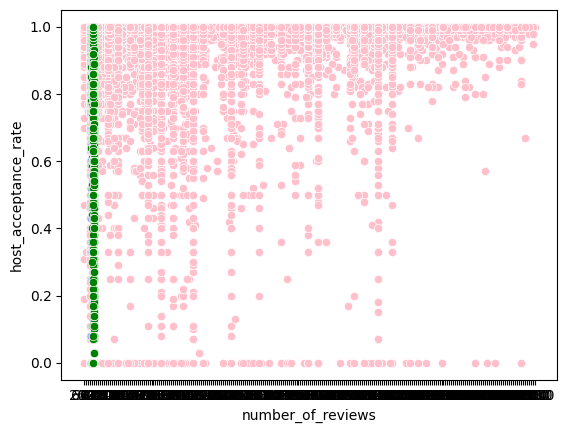

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=enthome_apt)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= enthome_apt['host_acceptance_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00052622,  0.04260519, -0.02108942]),
 'rank_': 3,
 'singular_': array([5571.00631929,   31.25260459,   18.29215604]),
 'intercept_': 0.8149073190130964}

**Modelo matemático: y= 0.0001707x1 + 0.00886669x2 + -0.00298158x3 + 0.9435067016176633**

In [ ]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.02025123942211926

In [ ]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.93246089, 0.94947269, 0.93234022, ..., 0.91392248, 0.91392248,
       0.91392248])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones3', y_pred)
enthome_apt.head()

,Predicciones3,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,0.932461,0.944247,0.0,2056638,20230329041210,10531228,3.0,7.0,19.35353,-99.16299,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,f
1,0.949473,0.960144,1.0,2072354,20230329041210,16840050,3.0,3.0,19.35358,-99.16948,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,f
2,0.932340,0.952051,2.0,696037,20230329041210,3531879,4.0,4.0,19.4418,-99.18402,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,f
3,0.913922,0.936714,3.0,35797,20230329041210,153786,1.0,1.0,19.38283,-99.2,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...",3658.0,t,2023-03-29,2012-10-31,2022-12-21,f
4,0.948022,0.964204,4.0,44616,20230329041210,196253,16.0,16.0,19.41162,-99.17794,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

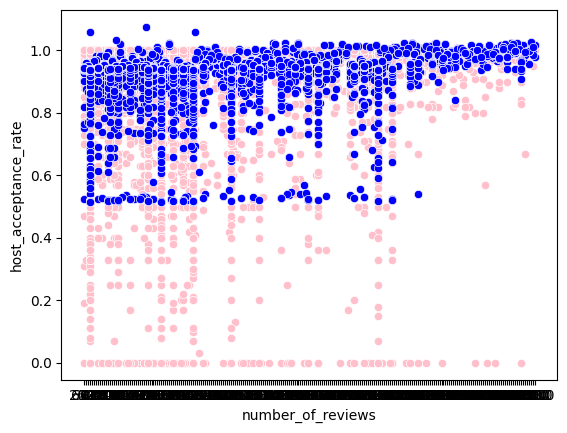

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

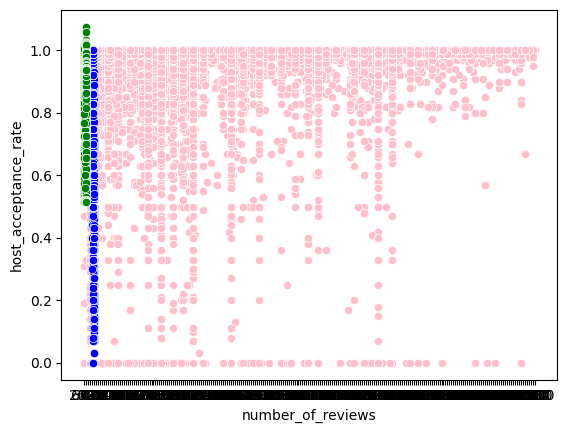

In [ ]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.02025123942211926
Coeficiente de correlación:  0.1423068495263642
